In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

# Lectura de matriz de alineamiento

In [3]:
df = pd.read_pickle("data\SNLI_dev_T.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label
0,0,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,PROPN}, the{the,DET}, sisters{siste...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.9142321, 0.07267378...","[0.0012857339, 0.8928781, 0.105836205]","[0.0, 1.0, 0.0]"
1,1,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.27006608, 0.475788, 0.07267378, ...","[0.8045815, 0.08481768, 0.11060087]","[1.0, 0.0, 0.0]"
2,2,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,PROPN}, the{the,DET}, men{man,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.48731184, 0.0726737...","[0.00022132808, 0.0018930121, 0.99788564]","[0.0, 0.0, 1.0]"
3,3,"[NULL{null,ADJ}, two{two,NUM}, young{young,ADJ...","[NULL{null,ADJ}, two{two,NUM}, kids{kid,NOUN},...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.27006608, 0.45478085, 0.20296031...","[0.06845684, 0.72006655, 0.21147671]","[1.0, 0.0, 0.0]"
4,4,"[NULL{null,ADJ}, two{two,NUM}, young{young,ADJ...","[NULL{null,ADJ}, two{two,NUM}, kids{kid,NOUN},...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.27006608, 0.45478085, 0.57462746...","[0.003195887, 0.8217409, 0.17506318]","[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
9837,9837,"[NULL{null,PROPN}, a{a,DET}, small{small,ADJ},...","[NULL{null,PROPN}, the{the,DET}, carousel{caro...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 1.9525918, 0.10360007...","[0.6548193, 0.33166176, 0.0135189155]","[1.0, 0.0, 0.0]"
9838,9838,"[NULL{null,PROPN}, a{a,DET}, small{small,ADJ},...","[NULL{null,PROPN}, the{the,DET}, girl{girl,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.30865958, 0.1036000...","[0.011330731, 0.97387874, 0.01479055]","[0.0, 0.0, 1.0]"
9839,9839,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,ADJ}, people{people,NOUN}, in{in,AD...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.51878333, 0.20296031, 0.06049277...","[0.34477213, 0.51214314, 0.14308473]","[1.0, 0.0, 0.0]"
9840,9840,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.110081404, 0.308659...","[0.00020331197, 0.008360422, 0.9914363]","[0.0, 0.0, 1.0]"


In [4]:
indice=0

In [5]:
t=pd.DataFrame(df.at[indice,"Text"][1:])
h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
print(len(t))
print(len(h))

10
15


In [6]:
texto = df.at[indice,"R_Text"]
hipotesis = df.at[indice,"R_Hip"]

In [7]:
#ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
ma=pd.DataFrame(np.dot(texto[:len(t)],hipotesis[:len(h)].T),index=t,columns=h)
ma

,"(the{the,DET},)","(sisters{sister,NOUN},)","(are{be,VERB},)","(hugging{hug,VERB},)","(goodbye{goodbye,NOUN},)","(while{while,ADP},)","(holding{hold,VERB},)","(to{to,PART},)","(go{go,VERB},)","(packages{package,NOUN},)","(after{after,ADP},)","(just{just,ADV},)","(eating{eat,VERB},)","(lunch{lunch,NOUN},)","(.{.,PUNCT},)"
"(two{two,NUM},)",1.000000,-0.051328,-0.055129,0.016222,-0.111046,-0.020999,0.004260,-0.005267,0.016558,-0.012139,0.008961,0.037068,0.004688,-0.061010,-0.012498
"(women{woman,NOUN},)",-0.031220,0.556537,0.421090,0.549081,0.181449,0.224021,0.553170,0.468660,0.404440,0.412518,0.284420,0.532680,0.529636,0.315370,0.307583
"(are{be,VERB},)",-0.019688,0.308287,0.448654,0.424444,0.220550,0.158344,0.416689,0.289928,0.341192,0.341974,0.104836,0.300758,0.373817,0.312460,0.169249
"(embracing{embrace,VERB},)",0.016222,0.424887,0.297823,1.000000,0.145943,0.143870,0.466340,0.365139,0.436715,0.458341,0.300386,0.276410,0.544713,0.302972,0.196570
"(while{while,ADP},)",-0.108339,0.310779,0.247916,0.269972,0.450882,0.286559,0.394562,0.350139,0.264541,0.176598,0.092322,0.172025,0.284695,0.284812,0.062793
"(holding{hold,VERB},)",0.004260,0.529183,0.351354,0.466340,0.400413,0.297656,1.000000,0.604679,0.495213,0.533630,0.209782,0.639286,0.631792,0.482857,0.396735
"(to{to,PART},)",-0.005267,0.483563,0.280686,0.365139,0.402543,0.257967,0.604679,1.000000,0.349824,0.362644,0.101032,0.439739,0.460706,0.326835,0.313984
"(go{go,VERB},)",0.016558,0.587738,0.267758,0.436715,0.124685,0.284244,0.495213,0.349824,1.000000,0.695315,0.244204,0.455825,0.576258,0.268244,0.297016
"(packages{package,NOUN},)",-0.012139,0.485137,0.321576,0.458341,0.202835,0.407456,0.533630,0.362644,0.695315,1.000000,0.228796,0.509879,0.694460,0.414084,0.451971
"(.{.,PUNCT},)",0.008961,0.188994,0.037052,0.300386,-0.014187,0.092406,0.209782,0.101032,0.244204,0.228796,1.000000,0.181446,0.240088,0.159524,0.250227


In [8]:
print(ma.mean())
print(ma.quantile(0.5))

(the{the,DET},)              0.086935
(sisters{sister,NOUN},)      0.382378
(are{be,VERB},)              0.261878
(hugging{hug,VERB},)         0.428664
(goodbye{goodbye,NOUN},)     0.200407
(while{while,ADP},)          0.213152
(holding{hold,VERB},)        0.467833
(to{to,PART},)               0.388678
(go{go,VERB},)               0.424800
(packages{package,NOUN},)    0.419768
(after{after,ADP},)          0.257474
(just{just,ADV},)            0.354512
(eating{eat,VERB},)          0.434085
(lunch{lunch,NOUN},)         0.280615
(.{.,PUNCT},)                0.243363
dtype: float32
(the{the,DET},)             -0.000503
(sisters{sister,NOUN},)      0.454225
(are{be,VERB},)              0.289254
(hugging{hug,VERB},)         0.430580
(goodbye{goodbye,NOUN},)     0.192142
(while{while,ADP},)          0.240994
(holding{hold,VERB},)        0.480777
(to{to,PART},)               0.356392
(go{go,VERB},)               0.377132
(packages{package,NOUN},)    0.387581
(after{after,ADP},)          0.2192

<AxesSubplot:>

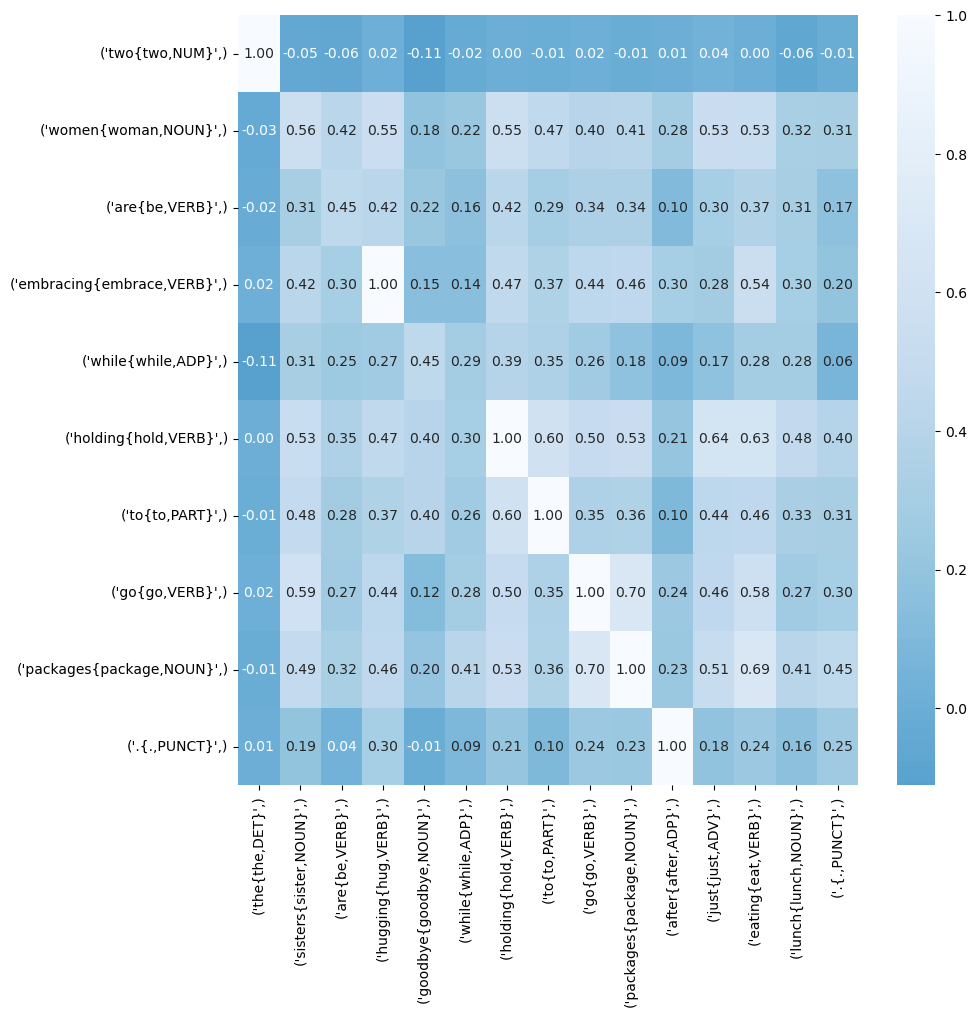

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ma, center=0, cmap='Blues_r', annot=True, fmt='.2f')

# Texto -> Hipótesis, tomando la longitud de la hipótesis en [NOUN,VERB,ADJ,ADV]

In [10]:
maximo=0
columna_v=""
indice_v=""
for c in ma.columns:
    if("VERB" in str(c)):
        if maximo<ma[c].max():
            maximo=ma[c].max()
            columna_v=str(c).split('\'')[1].split("{")[0]
            indice_v=str(ma[c].idxmax()).split('\'')[1].split("{")[0]
        #print(ma[c].max(),c,ma[c].idxmax())v
print(maximo, columna_v,indice_v)


1.0 go go


In [11]:
ma.quantile(0.25).values

array([-0.01780063,  0.30891024,  0.25287635,  0.31657457,  0.12999933,
        0.14748883,  0.40009371,  0.30490215,  0.28370373,  0.2570909 ,
        0.1019827 ,  0.20518684,  0.3069758 ,  0.27238557,  0.1760792 ])

In [33]:
def getRelacionesMA_corte(indice,df):
    indices=[]
    todas_relaciones=[]
    todas_relacionest=[]
    #print(len(df.at[indice,"Text"]),len(df.at[indice,"Hipotesis"]))
    if len(df.at[indice,"Text"]) > 42 and len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h[:41])
    elif len(df.at[indice,"Text"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h)
    elif len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h[:41])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t)
    else:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h)
        #ma=pd.DataFrame(df.at[indice,"Text"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
    #ma=ma/(ma.sum()).sum()
    #print(ma)
    c=ma.mean().values #.quantile(corte).values
    for index,strings in ma.iterrows():
        #print(index)
        for l in range(len(c)):
            if 'NOUN' in str(index) or 'VERB' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):
                if 'NOUN' in str(ma.columns[l]) or 'VERB' in str(ma.columns[l]) or 'ADJ' in str(ma.columns[l]) or 'PRON' in str(ma.columns[l]) or 'ADV' in str(ma.columns[l]):
                    #print("columnna:",col,strings[col])
                    #print("umbral",c[l],strings[l])
                    if strings[l] >= 0.3:#c[l]:# >=1:
                        todas_relaciones.append((index,ma.columns[l],strings[l]))
    maximo=0
    indice_v=""
    columna_v=""
    c=ma.max()
    for l in range(len(c)):
        for index,strings in ma.iterrows():
            if("VERB" in str(index)):
                if("VERB" in str(ma.columns[l])):
                    if maximo<=c[l]:
                        maximo=c[l]
                        columna_v=str(ma.columns[l]).split('\'')[1].split("{")[0]
                        indice_v=str(index).split('\'')[1].split("{")[0]
    #Dirección contraria
    mat=ma.transpose()
    #print(ma)
    #print(ma.shape)
    #print(mat)
    #print(mat.shape)
    c1=mat.mean().values #.quantile(corte).values
    for index,strings in mat.iterrows():
        for l in range(len(c1)):
            if 'NOUN' in str(index) or 'VERB' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):                
                if 'NOUN' in str(mat.columns[l]) or 'VERB' in str(mat.columns[l]) or 'ADJ' in str(mat.columns[l]) or 'PRON' in str(mat.columns[l]) or 'ADV' in str(mat.columns[l]):
                    #print("columnna:",col,strings[col])
                    #print("umbral",c[l])
                    if strings[l] >=0.3:# c1[l]:# >=1:
                        todas_relacionest.append((index,mat.columns[l],strings[l]))
    labels=["NOUN","ADJ","VERB","ADV"]
    diccionarioTW = {}
    #print(todas_relaciones)
    #todas_relaciones=list(set(todas_relaciones))
    for l1 in labels[:]:
        for l2 in labels[:]:
            diccionarioTW[l1+"_"+l2]=[]
    for tr in todas_relaciones:
        #print(tr[0],"-",tr[1])
        t_=str(tr[0]).split(",")
        pt=t_[1].split("}")[0]
        h_=str(tr[1]).split(",")
        #print(t_,h_,"h0",h_[0])
        ph=h_[1].split("}")[0]
        if pt=="PRON":
            pt="NOUN"
        if ph=="PRON":
            ph="NOUN"
        #diccionarioTW[pt+"_"+ph].append(tr[2])
        if pt+"_"+ph in diccionarioTW:
            diccionarioTW[pt+"_"+ph].append(tr[2])
    diccionarioTW_mean={}
    diccionarioTW_mean_n={}
    diccionarioTW_rel={}
    for k in diccionarioTW:
        if len(diccionarioTW[k])!=0:
            diccionarioTW_mean[k]=sum(diccionarioTW[k])#/len(diccionarioTW[k])
            diccionarioTW_mean_n[k+"_"]=len(diccionarioTW[k])#/ma.shape[0]
            diccionarioTW_rel[k+"_r"]=sum(diccionarioTW[k])/len(diccionarioTW[k])#/ma.shape[0]
        else:
            diccionarioTW_mean[k]=0
            diccionarioTW_mean_n[k+"_"]=0
            diccionarioTW_rel[k+"_r"]=0
            
    return diccionarioTW_mean,diccionarioTW_mean_n,todas_relaciones,todas_relacionest,diccionarioTW_rel,indice_v,columna_v

# Lectura de los 100 pares de T y H (muestreo)

In [13]:
prueba=pd.read_csv("data\snli_dev.csv")

In [14]:
textos = prueba["sentence1"].to_list()
hipotesis = prueba["sentence2"].to_list()
print(textos)
print(hipotesis)

['Two women are embracing while holding to go packages.', 'Two women are embracing while holding to go packages.', 'Two women are embracing while holding to go packages.', 'Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.', 'Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.', 'Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.', 'A man selling donuts to a customer during a world exhibition event held in the city of Angeles', 'A man selling donuts to a customer during a world exhibition event held in the city of Angeles', 'A man selling donuts to a customer during a world exhibition event held in the city of Angeles', 'Two young boys of opposing teams play 

In [15]:
import nltk, re, os
from nltk.corpus import wordnet as wn
import networkx as nx
from matplotlib import pyplot as plt


In [19]:
import spacy

nlp = spacy.load("en_core_web_md")

c:\Users\Ninja\anaconda3\lib\site-packages\torch\__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


# Antonimia e hiponimia

In [61]:
def revision_ant_hipo(relaciones_alineadas,wn):
    sinonimos_words=[]
    antonimos_words=[]
    hyperonyms_words=[]
    hyponyms_words=[]
    relaciones_fuertes=[]
    verbos=[]
    for r_a in relaciones_alineadas[:]:
        sim=0
        sim_h=0
        cam_sh=0
        max_lch=0
        pal_sim_a=""
        pal_sim_b=""
        # pal_simp_a=""
        # pal_simp_b=""
        # pal_simsp_a=""
        # pal_simsp_b=""
        # pal_simlch_a=""
        # pal_simlch_b=""
        #print(r_a[0],"a",r_a[1])
        word_t = str(r_a[0]).split('\'')[1]
        wt = word_t.split('{')[0]
        #lt = word_t.split('}')[0].split(',')[0].split('{')[1]
        #print(word_t)
        #print(word_t.split('}')[0].split(','))
        if len(word_t.split('}')[0].split(','))==2:
            pt = word_t.split('}')[0].split(',')[1]
        else:
            pt=""
        #print(pt)
        w_in_text= wt + "," + pt
        #print(wt,lt,pt)
        word_h = str(r_a[1]).split('\'')[1]
        wh = word_h.split('{')[0] #palabra tal cual
        #lh = word_h.split('}')[0].split(',')[0].split('{')[1] #palabra lematizada
        #print(word_h)
        if len(word_h.split('}')[0].split(','))==2:
            ph = word_h.split('}')[0].split(',')[1] # pos de la palabra
        else:
            ph=""
        #print(ph)
        word = wh + "," + ph # palabra con el pos correspondiente
        #print(wh,lh,ph)
        ## buscamos medidas de las relaciones alineadas a traves de wordnet
        if pt == "NOUN" or pt=="PRON":
            w1_=wn.synsets(wt,wn.NOUN)
        elif pt == "VERB":
            w1_=wn.synsets(wt,wn.VERB)
        elif pt == "ADJ":
            w1_=wn.synsets(wt,wn.ADJ)
        elif pt == "ADV":
            w1_=wn.synsets(wt,wn.ADV)
        else:
            w1_=wn.synsets(wt)
        if ph == "NOUN" or ph=="PRON":
            w2_=wn.synsets(wh,wn.NOUN)
        elif ph == "VERB":
            w2_=wn.synsets(wh,wn.VERB)
        elif ph == "ADJ":
            w2_=wn.synsets(wh,wn.ADJ)
        elif ph == "ADV":
            w2_=wn.synsets(wh,wn.ADV)
        else:
            w2_=wn.synsets(wh)
        for a in w1_:
            for b in w2_:
                if pt==ph:            
                    #print(w_in_text,word)
                    #Busqueda en las definiciones
                    # defiiniciones=[]
                    # if wh in a.definition().split():
                    #     print("yes:",wh,a.definition().split())
                    if a.wup_similarity(b)>sim:
                        sim=a.wup_similarity(b)
                        pal_sim_a=a
                        pal_sim_b=b
                        
                    # if a.path_similarity(b, simulate_root=False)!=None:
                    #     if a.path_similarity(b, simulate_root=False)>sim_h:
                    #         sim_h=b.path_similarity(a, simulate_root=False)
                    #         pal_simp_a=a
                    #         pal_simp_b=b
                    # if a.shortest_path_distance(b)!=None:
                    #     if a.shortest_path_distance(b)>cam_sh:
                    #         cam_sh=a.shortest_path_distance(b)
                    #         pal_simsp_a=a
                    #         pal_simsp_b=b
                    # if a.pos()==b.pos():
                    #     if a.lch_similarity(b)>max_lch:
                    #         max_lch=a.lch_similarity(b)
                    #         pal_simlch_a=a
                    #         pal_simlch_b=b
        if pt==ph:
            if pt=="VERB":
                verbos.append((wt,wh,sim))
            if sim!=0:
                #print("wup_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,sim)
                #if pal_sim_a.path_similarity(pal_sim_b, simulate_root=False)!=None:
                    #print("path_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.path_similarity(pal_sim_b, simulate_root=False))
                #if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                    #print("spath:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                #if pal_sim_a.pos()==pal_sim_b.pos():
                    #print("lch:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                
                #relaciones fuertes combinando las medidas de wordnet
                #wup nos ayuda a filtrar que tan similares son
                #distancia más corta nos ayuda a identificar que no se encuentren muy lejos en el arbol de wordnet
                #lch similarity ayuda a identificar que en la taxonomia no se encunetren alejados, para los que
                #tienen unj hiperonimo en comun

                if sim>0.5:
                    if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                        if pal_sim_a.shortest_path_distance(pal_sim_b)<=7:
                            #if pal_sim_a.pos()==pal_sim_b.pos():
                                #if pal_sim_a.lch_similarity(pal_sim_b)<2.0:
                                    relaciones_fuertes.append((pal_sim_a,pal_sim_b))
                #else:
                #    relaciones_debiles.append((pal_sim_a,pal_sim_b,-sim))
                #Busqueda de relaciones de sinonimia y antonimia
                synonyms=[]
                antonyms=[]   
                for l in pal_sim_a.lemmas():
                    synonyms.append(l.name())
                    #print(l)
                    if l.antonyms():
                        #print(l.antonyms()[0])
                        antonyms.append(l.antonyms()[0].name())
                if wh in synonyms:
                    #print("Sinonimo: ",wt,wh)
                    sinonimos_words.append((wt,wh))
                #print("antonimos",antonyms,pal_sim_a,pal_sim_b)
                for sense in pal_sim_b.lemmas():
                    #print(sense.name())
                    if sense.name() in antonyms:
                        #print("Antonimo: ",wt,wh)
                        antonimos_words.append((wt,wh))
                #Busqueda de relaciones de hiperonimia e hiponimia
                hyperonyms=pal_sim_a.hypernym_paths()
                for p in hyperonyms:
                    if pal_sim_b in p:
                        if(pal_sim_a.shortest_path_distance(pal_sim_b)!=0):
                            hyperonyms_words.append((wt,wh))
                            #print("hiperonimo:",pal_sim_a,pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                        else:
                            sinonimos_words.append((wt,wh))
                            #print("sinonimos",wt,wh)
                hyponyms=pal_sim_b.hypernym_paths()
                for p in hyponyms:
                    if pal_sim_a in p:
                        
                        if pal_sim_a.shortest_path_distance(pal_sim_b)!=0:
                            hyponyms_words.append((wt,wh))
                            #print("Hiponimo:",pal_sim_a,pal_sim_b,pal_sim_b.shortest_path_distance(pal_sim_a))
                #for lh in pal_sim_a.lowest_common_hypernyms(pal_sim_b):
                    #print("minimos hyper",lh)
                    #print("a->H",pal_sim_a.shortest_path_distance(lh))
                    #print("b->H",pal_sim_b.shortest_path_distance(lh))
                #print()
    #print("sinonimos",len(set(sinonimos_words)),sinonimos_words)
    #print("antonimos",len(set(antonimos_words)),antonimos_words)
    #print("hyperonyms",len(set(hyperonyms_words)),hyperonyms_words)
    #print("hyponyms",len(set(hyponyms_words)),hyponyms_words)
    #print("relaciones fuertes:",relaciones_fuertes)
    #print("relaciones debiles:",relaciones_debiles)
    #print("verbos: ",verbos)
    maxv=0
    for v in verbos:
        #print(v)
        if(float(v[2])>=maxv):
            maxv=v[2]
            v1=v[0]
            v2=v[1]
    #print(v1,v2)    
    return [len(set(sinonimos_words)),len(set(antonimos_words)),len(set(hyperonyms_words)),len(set(hyponyms_words)),maxv]

In [17]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses
#Load the model(here we use minilm)
model = SentenceTransformer('all-MiniLM-L6-v2')
#We get the embeddings by calling model.encode()

# prueba

In [63]:
features=[]
length=len(textos)
for i in range(length):
#length=[4]
#for i in length:
    print(i)
    #print("Texto: ",textos[i])
    #print("Hipótesis: ",hipotesis[i])
    doc1 = nlp(textos[i])
    for token in doc1:
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        #        token.shape_, token.is_alpha, token.is_stop)
        if token.dep_=="ROOT":
            r_t=token
    doc2 = nlp(hipotesis[i])
    for token in doc2:
        if token.dep_=="ROOT":
            r_h=token
    #print("similaridad: ",doc1.similarity(doc2))
    todas_relaciones,todos_conteos,relaciones_alineadas,relaciones_alineadast,relatip_num,tverb,hverb=getRelacionesMA_corte(i,df)
    #print(todas_relaciones)
    #print("Relaciones",len(relaciones_alineadas),len(relaciones_alineadast))
    rel_semanticas=revision_ant_hipo(relaciones_alineadas,wn)
    #print("semanticas",rel_semanticas)
    emb1 = model.encode(tverb)
    emb2 = model.encode(hverb)
    #Get the cosine similarity score between sentences
    cos_sim = util.cos_sim(emb1, emb2)
    similitud_verbos=float(cos_sim[0][0])
    #print("verbos a comparar",tverb,hverb)
    if len(relaciones_alineadast)==0:
        total=0
    else:
        total=len(relaciones_alineadas)/len(relaciones_alineadast)
    features.append(list(todas_relaciones.values())+list(todos_conteos.values())+rel_semanticas+[total,similitud_verbos])
    #len((set(textos[i].split()).intersection(set(hipotesis[i]))))/len(set(textos[i].split()).union(set(hipotesis[i])))]) 
    #+rel_semanticast)#[doc1.similarity(doc2)]+)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [64]:
df1 = pd.DataFrame(features, columns=list(todas_relaciones)+list(todos_conteos)+["sinonimos","antonimos","hiperonimos","hiponimos","action_wn","dif","sim verbos"])#,"similaridad_1_2","dif"])
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,dif,sim verbos
0,1.448654,0.000000,1.379265,0.373817,0.000000,0.000000,0.000000,0.0,1.795373,0.000000,...,0,0,0,5,0,0,3,1.0,1.0,0.234909
1,1.717893,0.000000,0.724830,0.000000,0.000000,0.000000,0.000000,0.0,1.017949,0.000000,...,0,0,0,4,0,0,1,1.0,1.0,0.288948
2,0.825094,0.000000,1.067380,0.000000,0.000000,0.000000,0.000000,0.0,0.791130,0.000000,...,0,0,0,1,1,1,0,1.0,1.0,0.288948
3,4.209440,3.204832,1.402741,0.000000,3.240385,1.412841,0.391655,0.0,1.749404,1.338535,...,0,0,0,4,0,0,0,1.0,1.0,0.920121
4,3.209440,2.303836,1.402741,0.000000,2.911291,1.412841,0.391655,0.0,1.749404,1.012467,...,0,0,0,3,0,0,0,1.0,1.0,0.920121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,1.000000,0.000000,0.341228,0.000000,0.000000,0.000000,0.871391,0.0,0.000000,0.000000,...,0,0,0,2,0,0,0,1.0,1.0,0.278433
9838,1.317596,0.000000,0.341228,0.000000,1.697802,0.000000,0.871391,0.0,2.254006,0.000000,...,0,0,0,2,0,0,0,1.0,1.0,0.278433
9839,4.776979,0.000000,0.000000,0.000000,3.386796,0.000000,0.000000,0.0,0.710696,0.000000,...,0,0,0,2,0,1,0,0.0,1.0,1.000000
9840,5.671221,1.593846,1.602101,0.000000,4.028700,2.281842,0.000000,0.0,0.000000,0.000000,...,0,0,0,2,0,1,1,0.0,1.0,0.299625


In [65]:
gold_label=prueba.gold_label.values
gold_label

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [66]:
df1["CLASS"]=gold_label

In [67]:
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,dif,sim verbos,CLASS
0,1.448654,0.000000,1.379265,0.373817,0.000000,0.000000,0.000000,0.0,1.795373,0.000000,...,0,0,5,0,0,3,1.0,1.0,0.234909,neutral
1,1.717893,0.000000,0.724830,0.000000,0.000000,0.000000,0.000000,0.0,1.017949,0.000000,...,0,0,4,0,0,1,1.0,1.0,0.288948,entailment
2,0.825094,0.000000,1.067380,0.000000,0.000000,0.000000,0.000000,0.0,0.791130,0.000000,...,0,0,1,1,1,0,1.0,1.0,0.288948,contradiction
3,4.209440,3.204832,1.402741,0.000000,3.240385,1.412841,0.391655,0.0,1.749404,1.338535,...,0,0,4,0,0,0,1.0,1.0,0.920121,entailment
4,3.209440,2.303836,1.402741,0.000000,2.911291,1.412841,0.391655,0.0,1.749404,1.012467,...,0,0,3,0,0,0,1.0,1.0,0.920121,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,1.000000,0.000000,0.341228,0.000000,0.000000,0.000000,0.871391,0.0,0.000000,0.000000,...,0,0,2,0,0,0,1.0,1.0,0.278433,entailment
9838,1.317596,0.000000,0.341228,0.000000,1.697802,0.000000,0.871391,0.0,2.254006,0.000000,...,0,0,2,0,0,0,1.0,1.0,0.278433,contradiction
9839,4.776979,0.000000,0.000000,0.000000,3.386796,0.000000,0.000000,0.0,0.710696,0.000000,...,0,0,2,0,1,0,0.0,1.0,1.000000,entailment
9840,5.671221,1.593846,1.602101,0.000000,4.028700,2.281842,0.000000,0.0,0.000000,0.000000,...,0,0,2,0,1,1,0.0,1.0,0.299625,contradiction


In [68]:
#df1.to_csv("TipoPalabra_conteos_umbral_mean.csv")
#df1.to_csv("TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_2.csv")
#df1.to_csv("TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_3.csv",index=False)
df1.to_csv("TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAsDEVs.csv",index=False)


In [ ]:
a=list(todas_relaciones)
a

['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']